In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

from adspy_shared_utilities import plot_two_class_knn

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

## Multi class classification

In [3]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits,
                                                   random_state=0)

clf = LinearSVC(C=5, random_state=67)
clf.fit(X_train, y_train)

print(clf.coef_)
print(clf.intercept_)


[[-0.39 -0.19  0.02 -0.07]
 [-0.19  0.63 -0.03  0.12]
 [-0.17 -0.26  0.02 -0.03]
 [ 0.68 -0.41 -0.02 -0.06]]
[-0.1   0.13 -0.05 -0.04]


### kernalized support vector machines

<IPython.core.display.Javascript object>


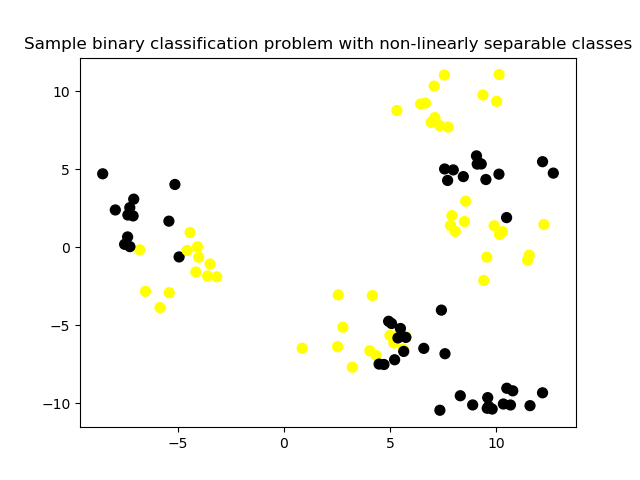

In [4]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


<IPython.core.display.Javascript object>


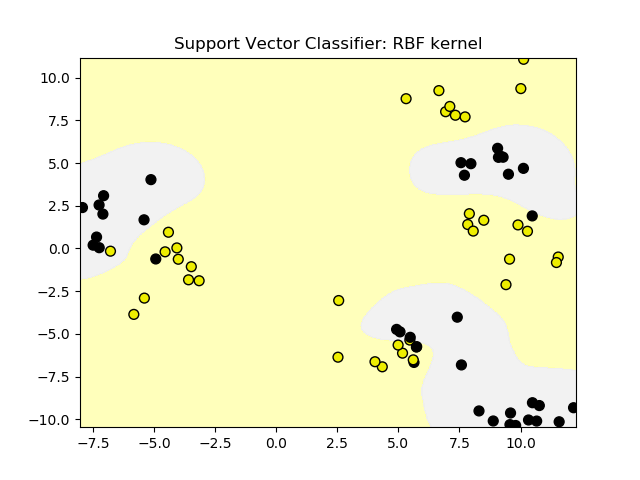

<IPython.core.display.Javascript object>


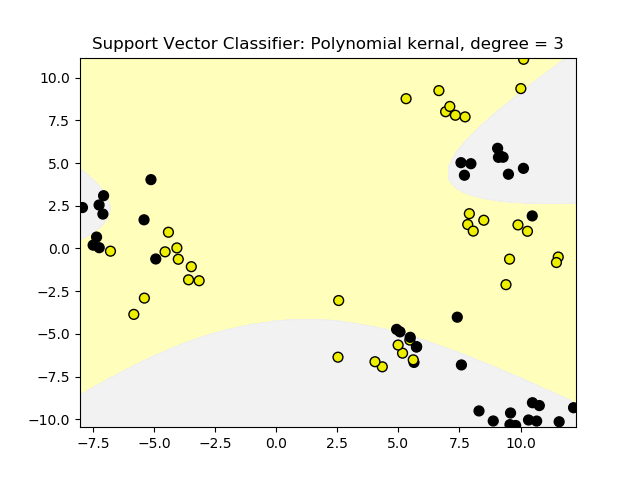

In [6]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3).fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: \
Polynomial kernal, degree = 3')

#### Controlling Gamma Parameter

<IPython.core.display.Javascript object>


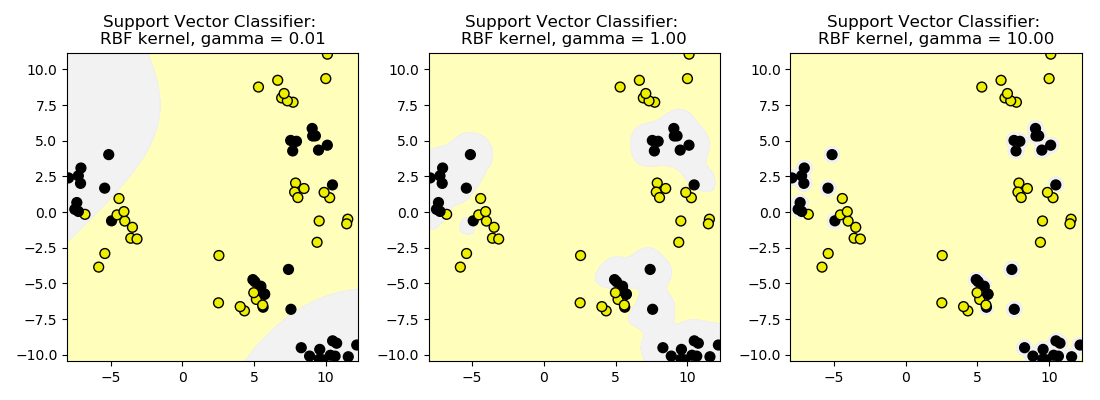

In [7]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
fig, subaxes = plt.subplots(1, 3, figsize=(11, 4))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \n\
RBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### gamma and C parameters

<IPython.core.display.Javascript object>


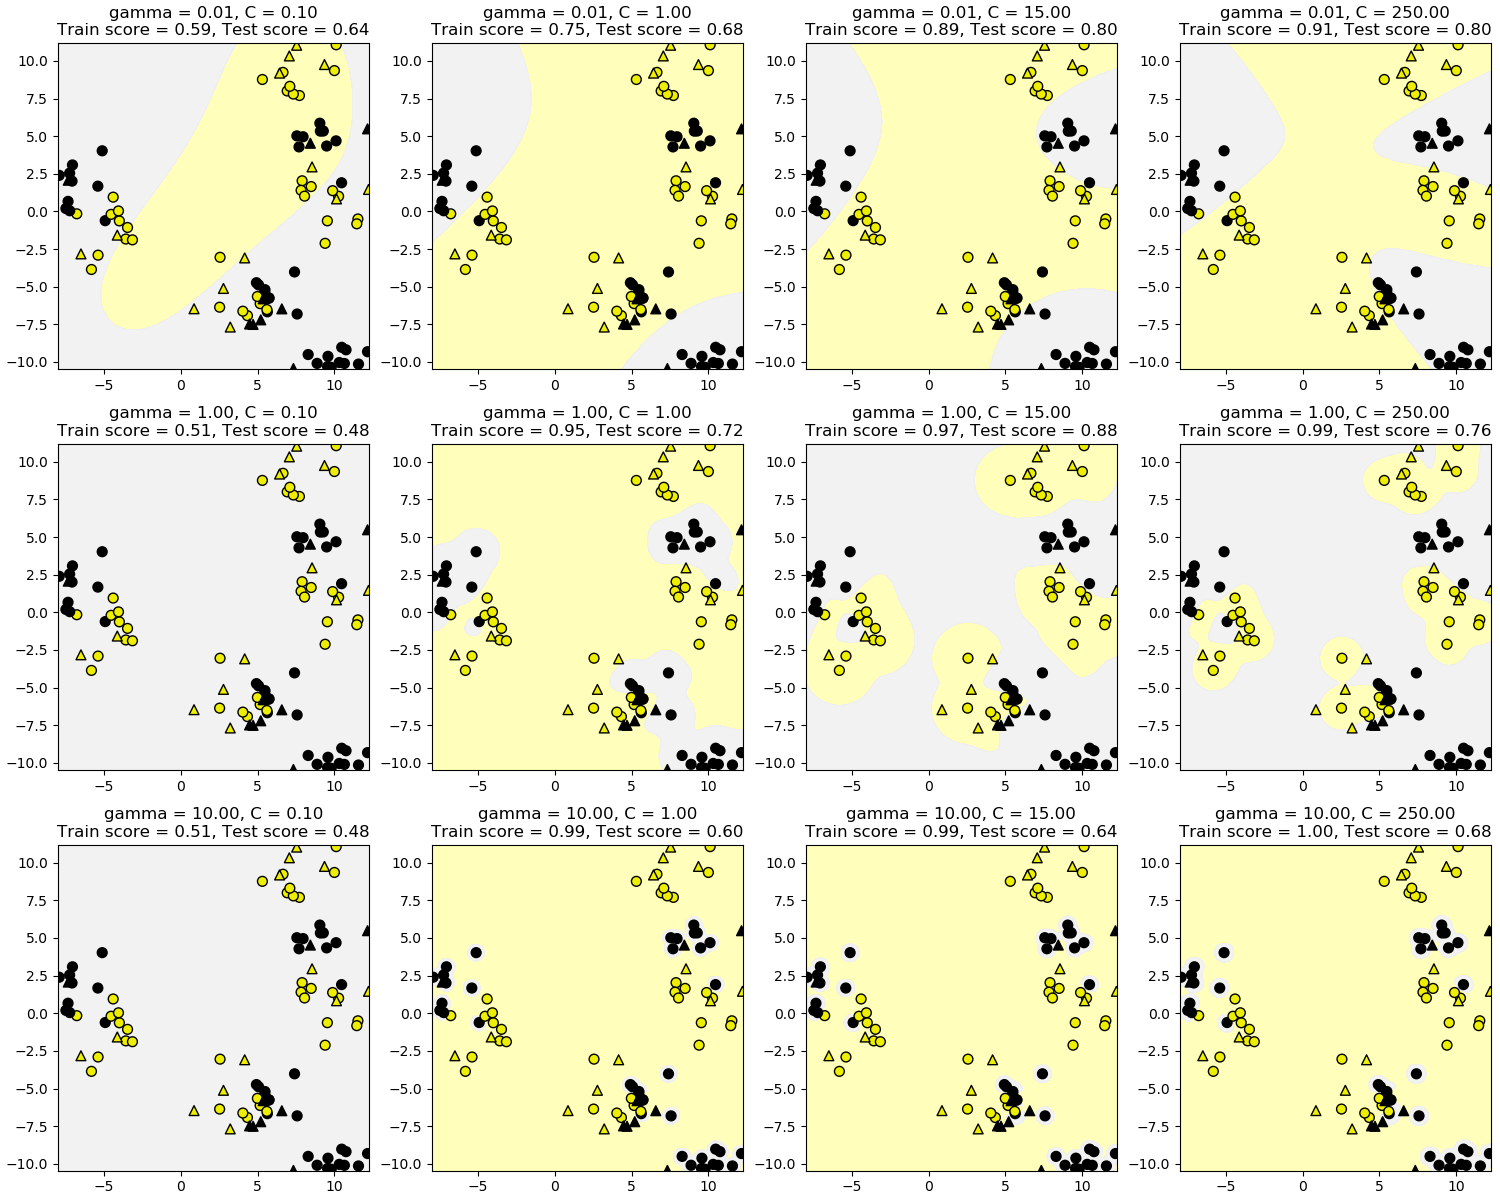

In [8]:
fig, subaxes = plt.subplots(3, 4, figsize=(15, 12))

for this_gamma, this_axis in zip([0.01, 1.0, 10.0], subaxes):
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma=this_gamma, C=this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title, subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Applying SVC to unnormalized data

In [9]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = SVC(C=10).fit(X_train, y_train)

print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF kernel SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF kernel SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF kernel SVC classifier on training set: 1.00
Accuracy of RBF kernel SVC classifier on test set: 0.63


### Min max scaling of this data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = SVC(C=10).fit(X_train_scaled, y_train)

print('Breast cancer dataset (Normalized on MinMax Scaling)')
print('Accuracy of RBF kernel SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of RBF kernel SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (Normalized on MinMax Scaling)
Accuracy of RBF kernel SVC classifier on training set: 0.98
Accuracy of RBF kernel SVC classifier on test set: 0.96


## Cross-validation

### Example based on k-NN classifier with fruit dataset (2 features)

In [12]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
      .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.77 0.74 0.83]
Mean cross-validation score (3-fold): 0.781


C:\Users\jwharton\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\jwharton\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


### Validation curves

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name='gamma',
                                             param_range=param_range, cv=5)


In [14]:
print(train_scores)

[[0.48 0.4  0.4  0.4  0.41]
 [0.83 0.79 0.77 0.77 0.73]
 [0.87 0.89 0.89 0.87 0.86]
 [0.98 1.   0.98 1.   0.98]]


In [15]:
print(test_scores)

[[0.54 0.33 0.33 0.33 0.3 ]
 [0.85 0.67 0.67 0.67 0.8 ]
 [0.46 0.67 0.83 0.83 0.7 ]
 [0.31 0.33 0.25 0.33 0.3 ]]


<IPython.core.display.Javascript object>


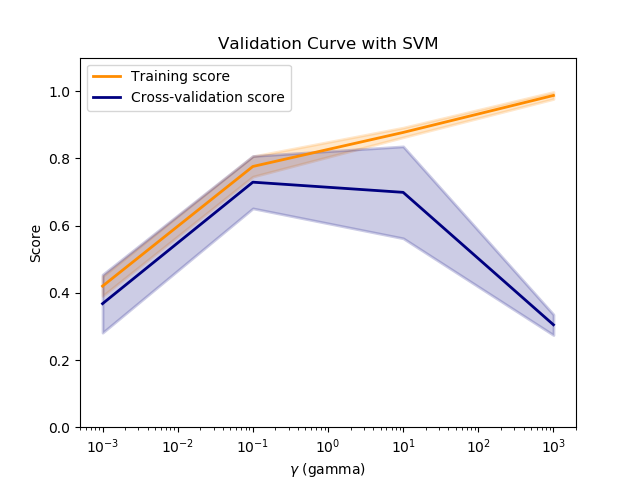

In [16]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

### Decision Trees

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=3)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training Set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test Set: {:.2f}'
     .format(clf.score(X_test, y_test)))



Accuracy of Decision Tree classifier on training Set: 1.00
Accuracy of Decision Tree classifier on test Set: 0.97


In [18]:
# controlling depth

clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training Set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test Set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training Set: 0.98
Accuracy of Decision Tree classifier on test Set: 0.97


### plotting a decision tree

In [19]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

<IPython.core.display.Javascript object>


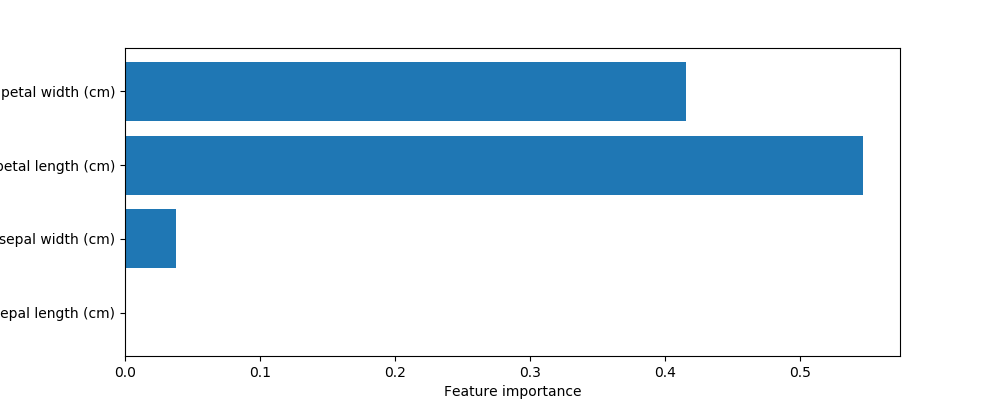

Feature importances: [0.   0.04 0.55 0.42]


In [28]:

#doesnt work
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4))
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'
     .format(clf.feature_importances_))

#### Test on real world dataset

Feature importances: [0.   0.   0.   0.   0.   0.   0.   0.78 0.   0.   0.   0.   0.   0.01
 0.   0.   0.   0.   0.   0.   0.   0.07 0.   0.13 0.01 0.   0.   0.
 0.   0.  ]


<IPython.core.display.Javascript object>


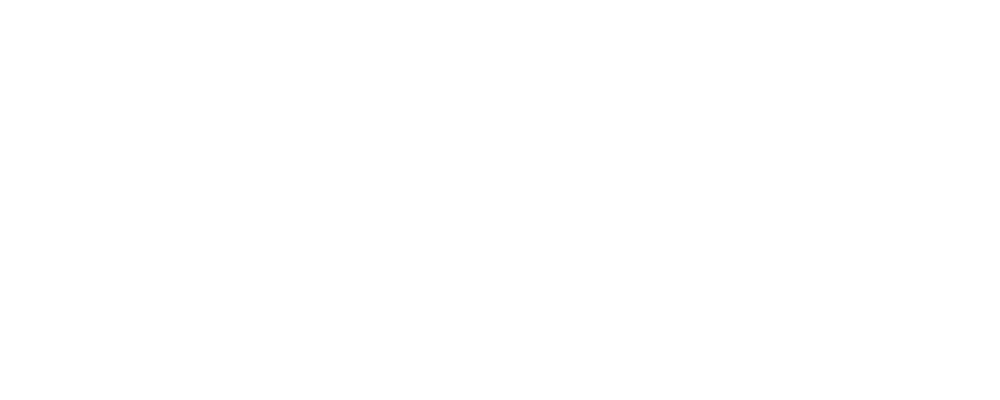

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
from adspy_shared_utilities import plot_feature_importances
clf = DecisionTreeClassifier(max_depth = 4,
                            min_samples_leaf= 8,
                            random_state = 0).fit(X_train, y_train)

#plot_decision_tree(clf, cancer.feature_names, cancer.target_names)
print('Feature importances: {}'
     .format(clf.feature_importances_))

plt.figure(figsize=(10,4))
plot_feature_importances(clf, X_cancer.columns)
plt.show()


In [25]:
X_cancer

array([[1.80e+01, 1.04e+01, 1.23e+02, ..., 2.65e-01, 4.60e-01, 1.19e-01],
       [2.06e+01, 1.78e+01, 1.33e+02, ..., 1.86e-01, 2.75e-01, 8.90e-02],
       [1.97e+01, 2.12e+01, 1.30e+02, ..., 2.43e-01, 3.61e-01, 8.76e-02],
       ...,
       [1.66e+01, 2.81e+01, 1.08e+02, ..., 1.42e-01, 2.22e-01, 7.82e-02],
       [2.06e+01, 2.93e+01, 1.40e+02, ..., 2.65e-01, 4.09e-01, 1.24e-01],
       [7.76e+00, 2.45e+01, 4.79e+01, ..., 0.00e+00, 2.87e-01, 7.04e-02]])

#### applied to cancer dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))